In [1]:
import numpy as np
import pandas as pd

In [3]:
municipaldebt = pd.read_csv(r"C:\Users\Paul Adrigwe\Downloads\archive\MunicipalDebtAnalysis.csv")

In [4]:
print(municipaldebt.head())

   accountcategoryid   accountcategory acccatabbr  propertyvalue  \
0                 12  Place of Worship        POW              0   
1                  1       Residential        RES              0   
2                  1       Residential        RES              0   
3                  1       Residential        RES              0   
4                  1       Residential        RES              0   

   propertysize  totalbilling  avgbilling  totalreceipting  avgreceipting  \
0             0          4177         116            16525           2066   
1             0          2084          58                0              0   
2             0          4177         116                0              0   
3             0          1862         155                0              0   
4             0          4456         124                0              0   

   total90debt  totalwriteoff  collectionratio  debtbillingratio  \
0            0              0             3.96              

In [7]:
norows = municipaldebt.shape[0]
print(f"Number of Rows{norows}")

Number of Rows138509


In [8]:
nocolumns = municipaldebt.shape[1]
print(f"Number of Columns{nocolumns}")

Number of Columns16


In [9]:
# Check for missing values in each column and count them
MissingValues = municipaldebt.isnull().sum()

# Display columns with missing values
print("Columns with missing values:")
print(MissingValues[MissingValues > 0])

Columns with missing values:
Series([], dtype: int64)


In [10]:
print(municipaldebt.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138509 entries, 0 to 138508
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   accountcategoryid  138509 non-null  int64  
 1   accountcategory    138509 non-null  object 
 2   acccatabbr         138509 non-null  object 
 3   propertyvalue      138509 non-null  int64  
 4   propertysize       138509 non-null  int64  
 5   totalbilling       138509 non-null  int64  
 6   avgbilling         138509 non-null  int64  
 7   totalreceipting    138509 non-null  int64  
 8   avgreceipting      138509 non-null  int64  
 9   total90debt        138509 non-null  int64  
 10  totalwriteoff      138509 non-null  int64  
 11  collectionratio    138509 non-null  float64
 12  debtbillingratio   138509 non-null  float64
 13  totalelecbill      138509 non-null  int64  
 14  hasidno            138509 non-null  int64  
 15  baddebt            138509 non-null  int64  
dtypes:

In [18]:
inputfeatures = municipaldebt.drop(['baddebt','accountcategoryid'], axis=1)
correlations = inputfeatures.corrwith(municipaldebt['baddebt']) 
correlations = correlations.abs().sort_values(ascending=False)

print('correlationfinal')
print(correlations)

correlationfinal
hasidno             0.306790
total90debt         0.151041
propertyvalue       0.093702
propertysize        0.064443
totalwriteoff       0.049561
totalreceipting     0.045989
avgbilling          0.037033
avgreceipting       0.030607
totalbilling        0.029536
totalelecbill       0.024861
debtbillingratio    0.003347
collectionratio     0.001559
dtype: float64


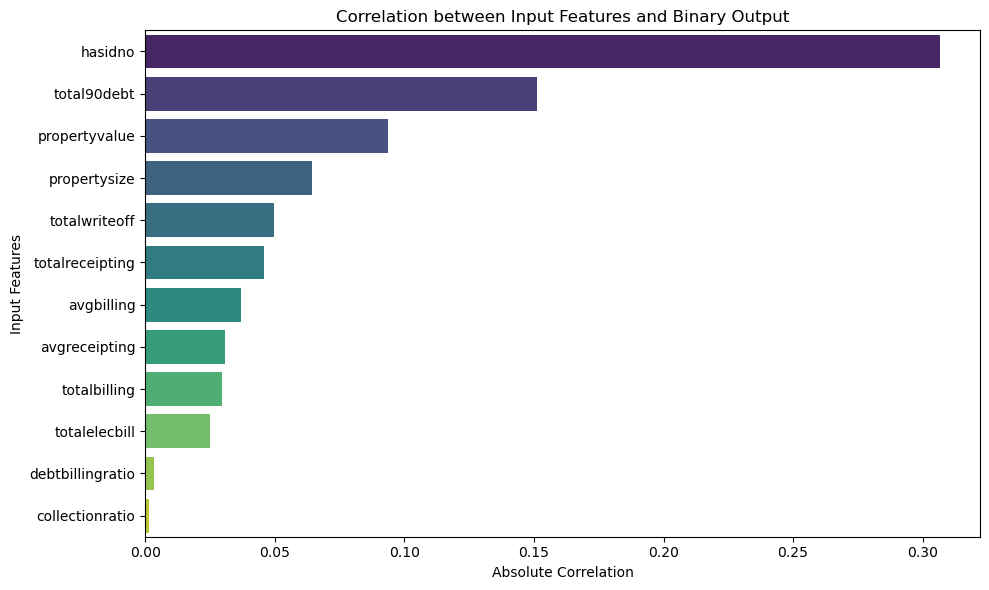

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.values, y=correlations.index, palette='viridis')
plt.xlabel('Absolute Correlation')
plt.ylabel('Input Features')
plt.title('Correlation between Input Features and Binary Output')
plt.tight_layout()
plt.show()